<font color= 'purple' font size="5">__Apply function to Series and DataFrame__</font>

In [1]:
import pandas as pd
#https://www.ritchieng.com/pandas-introduction/

In [2]:
url = 'http://bit.ly/kaggletrain'
train = pd.read_csv(url)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#create new columns
train['Sex_num']=train.Sex.map({'female':0,'male':1})

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [5]:
#column drop
#train.drop(['Sex_num'], axis=1)

In [6]:
# let's compared Sex and Sex_num columns
train.loc[0:5,['Sex','Sex_num']]

,Sex,Sex_num
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1
5,male,1


<font color= 'purple' font size="5">__apply() function as a Series method-Applies a function to each element in the Series__</font>

In [7]:
# say we want to calculate length of string in each string in "Name" column
# create new column
# we are applying Python's len function
train['Name_length']=train.Name.apply(len)

In [8]:
# the apply() method applies the function to each element in the column Name in the train data set
# Let's check this column for first 5 rows
train.loc[0:5,['Name','Name_length']]

,Name,Name_length
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44
4,"Allen, Mr. William Henry",24
5,"Moran, Mr. James",16


In [9]:
import numpy as np
# say we look at the "Fare" column and we want to round it up
# we will use numpy's ceil function to round up the numbers

In [10]:
train['Fare_ceil']=train.Fare.apply(np.ceil)
train.loc[0:5,['Fare','Fare_ceil']]

,Fare,Fare_ceil
0,7.2500,8.0
1,71.2833,72.0
2,7.9250,8.0
3,53.1000,54.0
4,8.0500,9.0
5,8.4583,9.0


In [11]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [12]:
#Let's extract last name of the each person
#We will use a str method
#Now the series is a list of strings
#each cell has 2 strings in a list as you can see below
train.Name.str.split(',').head()

0                           [Braund,  Mr. Owen Harris]
1    [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                            [Heikkinen,  Miss. Laina]
3      [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                          [Allen,  Mr. William Henry]
Name: Name, dtype: object

In [13]:
# we just want the first string from the list
# we create a function to retrieve
def get_element(my_list,position):
    return my_list[position]

In [14]:
# use our created get_element function
# we pass position=0
train.Name.str.split(',').apply(get_element,position=0).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

In [15]:
# instead of above we can use a lambda function
# input x (the list in this case)
# output x[0] (the first string of the list in this case)
train.Name.str.split(',').apply(lambda x:x[0]).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

In [16]:
# getting the second string
train.Name.str.split(',').apply(lambda x:x[1]).head()

0                                Mr. Owen Harris
1     Mrs. John Bradley (Florence Briggs Thayer)
2                                    Miss. Laina
3             Mrs. Jacques Heath (Lily May Peel)
4                              Mr. William Henry
Name: Name, dtype: object

<font color= 'purple' font size="5">__apply() function as a DataFrame method-Applies a function on either axis of the DataFrame__</font>

In [17]:
url = 'http://bit.ly/drinksbycountry'
drinks = pd.read_csv(url)
drinks.head()


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [18]:
drinks.loc[:,'beer_servings':'wine_servings'].head()

,beer_servings,spirit_servings,wine_servings
0,0,0,0
1,89,132,54
2,25,0,14
3,245,138,312
4,217,57,45


In [19]:
# you want apply() method to travel axis=0 (downwards, column) 
# apply Python's max() function
drinks.loc[:,'beer_servings':'wine_servings'].apply(max, axis=0)

beer_servings      376
spirit_servings    438
wine_servings      370
dtype: int64

In [20]:
# you want apply() method to travel axis=1 (right, row) 
# apply Python's max() function
drinks.loc[:,'beer_servings':'wine_servings'].apply(max,axis=1).head()

0      0
1    132
2     25
3    312
4    217
dtype: int64

In [21]:
# finding which column is the maximum's category name
drinks.loc[:,'beer_servings':'wine_servings'].apply(np.argmax,axis=1).head()
#Burada her bir satıra bakıyor ve her bir satır hangi sutun için max değerini alıyorsa o sutunun ismini yazdırıyor.

C:\Users\damga\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


0      beer_servings
1    spirit_servings
2      beer_servings
3      wine_servings
4      beer_servings
dtype: object

applymap() as a DataFrame method
Applies function to every element

In [22]:
drinks.loc[:,'beer_servings':'wine_servings'].applymap(float).head()

,beer_servings,spirit_servings,wine_servings
0,0.0,0.0,0.0
1,89.0,132.0,54.0
2,25.0,0.0,14.0
3,245.0,138.0,312.0
4,217.0,57.0,45.0


In [23]:
# overwrite existing table
drinks.loc[:,'beer_servings':'wine_servings']=drinks.loc[:,'beer_servings':'wine_servings'].applymap(float)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


<font color= 'purple' font size="5">__Read Tabular Data File into Pandas__</font>

In [24]:
#Read tabular data file into pandas
url2 = 'http://bit.ly/movieusers'
users = pd.read_table(url2)
users.head()

C:\Users\damga\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


,1|24|M|technician|85711
0,2|53|F|other|94043
1,3|23|M|writer|32067
2,4|24|M|technician|43537
3,5|33|F|other|15213
4,6|42|M|executive|98101


issues:


1. Separator is a pipe character

We need to tell pandas that this is the separator using sep=

2. There is no header

We need to use header=None

We can add a row of names for the columns using names=user_cols






In [25]:
user_cols=['user_id','age', 'gender', 'occupation', 'zip_code']
users=pd.read_table(url2, sep='|', header=None, names=user_cols)
users.head()

C:\Users\damga\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Tips
If you've a data file where you've some text at the top and bottom of the file

skiprows=None

Skip rows at the top or bottom

skipfooter=None

Read the documentation: 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html

<font color= 'purple' font size="5">__Selecting Pandas Series__</font>

In [26]:
# The csv file is separated by commas

#method 1 read table
url = 'http://bit.ly/uforeports'
ufo=pd.read_table(url,sep=',')
ufo.head()

C:\Users\damga\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead.
  """


,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [27]:
# method 2 read csv file
ufo=pd.read_csv(url)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [28]:
# Method 1: Selecting City series (this will always work)
ufo['City']
# Method 2: Selecting City series
ufo.City.head()

0                  Ithaca
1             Willingboro
2                 Holyoke
3                 Abilene
4    New York Worlds Fair
Name: City, dtype: object

In [29]:
# confirm type
type(ufo['City'])
type(ufo.City)

pandas.core.series.Series

How do you select a column name with spacing between words?


You cannot use method 2 (ufo.category_name)


You have to use method 1 (ufo['category name'])

<font color= 'purple' font size="5">__How do I create a new panda Series in a DataFrame?__</font>


In [30]:
# example of concantenating strings
'ab' + 'cd'

'abcd'

In [31]:
# created new columns called "Location" with a concentration of "City" and "State"
ufo['Location']=ufo.City + ', ' + ufo.State
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


<font color= 'purple' font size="5">__Pandas Parentheses__</font>

Pandas commands ending with parentheses and those that do not

In [32]:
url = 'http://bit.ly/imdbratings'
movies = pd.read_csv(url)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [33]:
movies.shape

(979, 6)

In [34]:
# This will show descriptive statistics of numeric columns
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [35]:
movies.describe(include='float64')

,star_rating
count,979.000000
mean,7.889785
std,0.336069
min,7.400000
25%,7.600000
50%,7.800000
75%,8.100000
max,9.300000


In [36]:
#finding out data types of each columns
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [37]:
type(movies)

pandas.core.frame.DataFrame

As a Data Frame, it has certain methods and attributes

Methods: with parentheses


**Action-oriented
* movies.head()
* movies.describe()



**Parentheses allows optional arguments
* movies.describe(include='object')

Attributes: without parentheses
- Description-oriented
* movies.shape
* movies.dtypes



Hit shift + tab multiple times to learn more about the parantheses

<font color= 'purple' font size="5">__Renaming columns in a pandas DataFrame__</font>

In [38]:
print(ufo.head())
# to check out only the columns 
# it will output a list of columns 
ufo.columns

                   City Colors Reported Shape Reported State             Time  \
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00   
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00   
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00   
3               Abilene             NaN           DISK    KS   6/1/1931 13:00   
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00   

                   Location  
0                Ithaca, NY  
1           Willingboro, NJ  
2               Holyoke, CO  
3               Abilene, KS  
4  New York Worlds Fair, NY  


Index([u'City', u'Colors Reported', u'Shape Reported', u'State', u'Time',
       u'Location'],
      dtype='object')

Method 1: Renaming a single column

In [39]:
# inplace=True to affect Dataframe
ufo.rename(columns={'Colors Reported':'Colors_Reported','Shape Reported':'Shape_Reported'}, inplace=True)
ufo.columns

Index([u'City', u'Colors_Reported', u'Shape_Reported', u'State', u'Time',
       u'Location'],
      dtype='object')

Method 2: Renaming multiple columns

In [40]:
ufo_cols = ['city', 'colors reported', 'shape reported', 'state', 'time', 'location']
ufo.columns = ufo_cols
ufo.head()

,city,colors reported,shape reported,state,time,location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


Method 3: Change columns while reading

In [41]:
ufo_cols2=['city', 'colors reported', 'shape reported', 'state', 'time']
url = 'http://bit.ly/uforeports'
ufo = pd.read_csv(url, names=ufo_cols2, header=0)
ufo.head()

,city,colors reported,shape reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


Method 4: Replacing spaces with underscores for all columns 
If you have a 100 columns, some had spaces in them and you want to replace all the spaces with underscores

In [42]:
ufo.columns=ufo.columns.str.replace(' ','_')
ufo.head()

,city,colors_reported,shape_reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


<font color= 'purple' font size="5">__Removing Columns__</font>

In [43]:
url = 'http://bit.ly/uforeports'
ufo = pd.read_csv(url)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [44]:
# Removing column 
# axis = 0 row axis
# axis = 1 column axis
# inplace = True to affect change
ufo.drop('Colors Reported', axis=1, inplace=True)
ufo.head()

,City,Shape Reported,State,Time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,OTHER,NJ,6/30/1930 20:00
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00


In [45]:
list_drop = ['City','State']
ufo.drop(list_drop, axis=1, inplace=True)
ufo.head()

,Shape Reported,Time
0,TRIANGLE,6/1/1930 22:00
1,OTHER,6/30/1930 20:00
2,OVAL,2/15/1931 14:00
3,DISK,6/1/1931 13:00
4,LIGHT,4/18/1933 19:00


<font color= 'pink' font size="7">__Sorting__</font>

In [46]:
url = 'http://bit.ly/imdbratings'
movies = pd.read_csv(url)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [47]:
# sort using sort values 
# sort with numbers firts then alphabectical order
movies.title.sort_values()
# alternative sorting
movies['title'].sort_values()

542                   (500) Days of Summer
5                             12 Angry Men
201                       12 Years a Slave
698                              127 Hours
110                  2001: A Space Odyssey
910                                   2046
596                               21 Grams
624                              25th Hour
708                       28 Days Later...
60                                3 Idiots
225                                 3-Iron
570                                    300
555                           3:10 to Yuma
427           4 Months, 3 Weeks and 2 Days
824                                     42
597                                  50/50
203                                  8 1/2
170                       A Beautiful Mind
941                       A Bridge Too Far
571                           A Bronx Tale
266                      A Christmas Story
86                      A Clockwork Orange
716                         A Few Good Men
750        

In [48]:
# returns a series
type(movies['title'].sort_values())

pandas.core.series.Series

In [49]:
# sort column
# sort in ascending=False
# this does not affect the underlying data 
movies.title.sort_values(ascending=False)

864                                  [Rec]
526                                   Zulu
615                             Zombieland
677                                 Zodiac
955                       Zero Dark Thirty
535                                  Zelig
280                     Young Frankenstein
96                                 Yojimbo
235                                Yip Man
403                             Ying xiong
695                      Y Tu Mama Tambien
871                                     X2
532                     X-Men: First Class
248             X-Men: Days of Future Past
954                                  X-Men
518                         Wreck-It Ralph
970                            Wonder Boys
65             Witness for the Prosecution
920                                Witness
483                           Withnail & I
270                        Wings of Desire
497    Willy Wonka & the Chocolate Factory
127                      Wild Strawberries
219        

In [50]:
# sort Dataframe using a particular column
movies.sort_values('title').head()

,star_rating,title,content_rating,genre,duration,actors_list
542,7.8,(500) Days of Summer,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
201,8.1,12 Years a Slave,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
698,7.6,127 Hours,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
110,8.3,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."


In [51]:
movies.sort_values('duration',ascending=False).head()

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."


In [52]:
# sorting a dataframe using multiple columns
# create list of columns 
# then within content_rating, sort by duration
columns=['content_rating','duration']

# sort column 
movies.sort_values(columns).head()

,star_rating,title,content_rating,genre,duration,actors_list
713,7.6,The Jungle Book,APPROVED,Animation,78,"[u'Phil Harris', u'Sebastian Cabot', u'Louis P..."
513,7.8,Invasion of the Body Snatchers,APPROVED,Horror,80,"[u'Kevin McCarthy', u'Dana Wynter', u'Larry Ga..."
272,8.1,The Killing,APPROVED,Crime,85,"[u'Sterling Hayden', u'Coleen Gray', u'Vince E..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
612,7.7,A Hard Day's Night,APPROVED,Comedy,87,"[u'John Lennon', u'Paul McCartney', u'George H..."


<font color= 'pink' font size="7">__Filtering__</font>

In [53]:
url = 'http://bit.ly/imdbratings'

movies = pd.read_csv(url)

movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [54]:
movies.shape

(979, 6)

In [55]:
# booleans
type(True)
type(False)

bool

We want to create a list of booleans with the same number of rows as the movies' DataFrame

True if duration > 200


False if otherwise

In [56]:
# create list
booleans = []

#Loop
for length in movies.duration:
    if length >= 200:
        booleans.append(True)
    else:
        booleans.append(False)      

In [57]:
booleans[0:5]

[False, False, True, False, False]

In [58]:
# len(booleans) is the same as the number of rows in movies' DataFrame
len(booleans)

979

In [59]:
# converts booleans into a pandas series
is_long=pd.Series(booleans)
is_long.head()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [60]:
# pulls out genre
movies['genre'].head()

0     Crime
1     Crime
2     Crime
3    Action
4     Crime
Name: genre, dtype: object

In [61]:
# this pulls out duration >= 200mins
movies[is_long]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


Faster method without a for loop

In [62]:
# this line of code replaces the for loop
# when you use a series name using pandas and use a comparison operator, it will loop through each row
is_long = movies.duration >= 200
is_long.head()

0    False
1    False
2     True
3    False
4    False
Name: duration, dtype: bool

In [63]:
movies[is_long].head()

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."


Even better way to simplify movies[is_long]

In [64]:
movies[movies.duration>=200].head()

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."


Additional tip: we want to study the duration and only the genre instead of all the columns

In [65]:
movies[movies.duration>=200]['genre']
movies[movies.duration>=200].genre.head()

2         Crime
7     Adventure
17        Drama
78        Crime
85    Adventure
Name: genre, dtype: object

<font color= 'pink' font size="5">__Multiple Filtering__</font>

2 conditions:

- duration > 200


- genre only Drama

In [66]:
True or False

True

In [67]:
True and False

False

In [68]:
# when you wrap conditions in parantheses, you give order
# you do those in brackets first before 'and' 
#AND
movies[(movies.duration>=200) & (movies.genre=='Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [69]:
#OR
movies[(movies.duration>=200) | (movies.genre=='Drama')].head()

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


In [70]:
((movies.duration>=200) | (movies.genre=='Drama')).head()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [71]:
((movies.duration>=200) & (movies.genre=='Drama')).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

What if you want genres crime, drama, and action?

In [72]:
movies[(movies.genre=='Drama')|(movies.genre=='Crime')|(movies.genre=='Action')].head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [73]:
# fast method
filter_list=['Crime','Drama','Action']
movies[movies.genre.isin(filter_list)].head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


<font color= 'pink' font size="7">__Examining Dataset__</font>


Reading subset of columns or rows, iterating through a Series or DataFrame, dropping all non-numeric columns and passing arguments

1. Reading subset of columns or rows

In [74]:
link = 'http://bit.ly/uforeports'
ufo = pd.read_csv(link)
ufo.columns

Index([u'City', u'Colors Reported', u'Shape Reported', u'State', u'Time'], dtype='object')

In [75]:
# reference using string
cols=['City','State']
ufo=pd.read_csv(link,usecols=cols)
ufo.head()

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


In [76]:
# reference using position (Integer)
cols2=[0,4]
ufo=pd.read_csv(link,usecols=cols2)
ufo.head()

,City,Time
0,Ithaca,6/1/1930 22:00
1,Willingboro,6/30/1930 20:00
2,Holyoke,2/15/1931 14:00
3,Abilene,6/1/1931 13:00
4,New York Worlds Fair,4/18/1933 19:00


In [77]:
# if you only want certain number of rows
ufo = pd.read_csv(link,nrows=3)
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


2. Iterating through a Series and DataFrame

In [78]:
# intuitive method
for c in ufo.City:
    print(c)

Ithaca
Willingboro
Holyoke


In [79]:
# pandas method
# you can grab index and row 
for index, row in ufo.iterrows():
    print(index, row.City, row.State)

(0L, 'Ithaca', 'NY')
(1L, 'Willingboro', 'NJ')
(2L, 'Holyoke', 'CO')


3. Drop non-numeric column in a DataFrame

In [80]:
link = 'http://bit.ly/drinksbycountry'
drinks = pd.read_csv(link)

In [81]:
# you have 2 non-numeric columns
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [82]:
drinks.select_dtypes(include=[np.number]).dtypes

beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

4. Passing arguments, when to use list or string

In [83]:
drinks.describe(include='all')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
count,193,193.000000,193.000000,193.000000,193.000000,193
unique,193,NaN,NaN,NaN,NaN,6
top,Lesotho,NaN,NaN,NaN,NaN,Africa
freq,1,NaN,NaN,NaN,NaN,53
mean,NaN,106.160622,80.994819,49.450777,4.717098,NaN
std,NaN,101.143103,88.284312,79.697598,3.773298,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,20.000000,4.000000,1.000000,1.300000,NaN
50%,NaN,76.000000,56.000000,8.000000,4.200000,NaN
75%,NaN,188.000000,128.000000,59.000000,7.200000,NaN


In [84]:
# here you pass a list
# use shift + tab to know what arguments to pass in
list_include=['object','float64']
drinks.describe(include=list_include)

,country,total_litres_of_pure_alcohol,continent
count,193,193.000000,193
unique,193,NaN,6
top,Lesotho,NaN,Africa
freq,1,NaN,53
mean,NaN,4.717098,NaN
std,NaN,3.773298,NaN
min,NaN,0.000000,NaN
25%,NaN,1.300000,NaN
50%,NaN,4.200000,NaN
75%,NaN,7.200000,NaN


<font color= 'pink' font size="7">__Using "axis" Parameter__</font>

In [85]:
url = 'http://bit.ly/drinksbycountry'
drinks = pd.read_csv(url)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [86]:
# Let's remove "continent" column
# axis=1 drops the column
drinks.drop('continent',axis=1).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [87]:
# drops second row 
# axis=0 drops the row
drinks.drop(2,axis=0).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America


In [88]:
# drops multiple rows
drops_rows = [0,1]
drinks.drop(drops_rows, axis=0).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America


In [89]:
# mean of each numeric column
drinks.mean()

# it is the same as the following command as axis=0 is the default
# drinks.mean(axis=0)
# it instructs pandas to move vertically

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [90]:
# mean of each row
# drinks.mean(axis='columns')
drinks.mean(axis=1).head()

0      0.000
1     69.975
2      9.925
3    176.850
4     81.225
dtype: float64

In [91]:
drinks.mean(axis='index')

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

<font color= 'pink' font size="7">__Using String Methods__</font>

In [92]:
# convert string to uppercase in Python
'hello'.upper()

'HELLO'

In [93]:
url = 'http://bit.ly/chiporders'
orders = pd.read_table(url)
orders.head()

C:\Users\damga\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


Making the item_name uppercase

In [94]:
# .str is a string method
orders.item_name.str.upper().head()

0             CHIPS AND FRESH TOMATO SALSA
1                                     IZZE
2                         NANTUCKET NECTAR
3    CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                             CHICKEN BOWL
Name: item_name, dtype: object

Check presence of substring 
This is useful to filter data

In [95]:
orders.item_name.str.contains('Chicken').head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

Chain string methods

In [96]:
# replacing elements
orders.choice_description.str.replace('[','').head()

0                                                  NaN
1                                          Clementine]
2                                               Apple]
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

In [97]:
# chain string methods
orders.choice_description.str.replace('[','').str.replace(']','').head()

0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

In [98]:
# using regex to simplify the code above
orders.choice_description.str.replace('[\[\]]', '').head()

0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

<font color= 'purple' font size="7">__Changing data type__</font>

Changing data type of a pandas Series

In [99]:
url = 'http://bit.ly/drinksbycountry'
drinks = pd.read_csv(url)

In [100]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

Data type summary

- 3 integers (int64)
- 1 floating (float64)
- 2 objects (object)

Method 1: Change datatype after reading the csv

In [101]:
# to change use .astype()
drinks['beer_servings']=drinks.beer_servings.astype(float)
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

Method 2: Change datatype before reading the csv

In [102]:
drinks=pd.read_csv(url,dtype={'beer_servings':float})
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [103]:
url = 'http://bit.ly/chiporders'
orders = pd.read_table(url)
orders.head()

C:\Users\damga\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [104]:
orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

The issue here is how pandas don't recognize item_price as a floating object

In [105]:
orders['item_price']=orders.item_price.str.replace('$','').astype(float)

In [106]:
orders.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [107]:
# we can now calculate the mean
orders.item_price.mean()

7.464335785374397

To find out whether a column's row contain a certain string by return True or False

In [108]:
orders['item_name'].str.contains('Chicken').head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

<font color= 'purple' font size="7">__Using "groupby"__</font>


In [109]:
url = 'http://bit.ly/drinksbycountry'
drinks = pd.read_csv(url)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [110]:
# get mean of the beer_servings' column
drinks['beer_servings'].mean()

106.16062176165804

In [111]:
# get mean of beer_servings for each continent by using groupby
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [112]:
# here we are accessing all of Africa in the column "continent"
drinks[drinks.continent=='Africa'].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,Africa
4,Angola,217,57,45,5.9,Africa
18,Benin,34,4,13,1.1,Africa
22,Botswana,173,35,35,5.4,Africa
26,Burkina Faso,25,7,7,4.3,Africa


In [113]:
drinks[drinks.continent=='Africa'].mean()

beer_servings                   61.471698
spirit_servings                 16.339623
wine_servings                   16.264151
total_litres_of_pure_alcohol     3.007547
dtype: float64

In [114]:
drinks[drinks.continent=='Africa'].beer_servings.mean()

61.471698113207545

In [115]:
drinks[drinks.continent=='Europe'].beer_servings.mean()

193.77777777777777

This is the same as the number given when we used .groupby

This is because we are grouping beer_servings by the continent

.groupby max and min

In [116]:
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [117]:
drinks.groupby('continent').beer_servings.min()

continent
Africa            0
Asia              0
Europe            0
North America     1
Oceania           0
South America    93
Name: beer_servings, dtype: int64

Aggregate findings

In [118]:
drinks.groupby('continent').beer_servings.agg(['count','mean','max','min'])

,count,mean,max,min
continent,,,,
Africa,53,61.471698,376,0
Asia,44,37.045455,247,0
Europe,45,193.777778,361,0
North America,23,145.434783,285,1
Oceania,16,89.687500,306,0
South America,12,175.083333,333,93


you can get mean of all numeric columns instead of specifying beer_servings 

In [119]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


Visualization

In [120]:
# allow plots o appear in notebook using matplotlib
%matplotlib inline

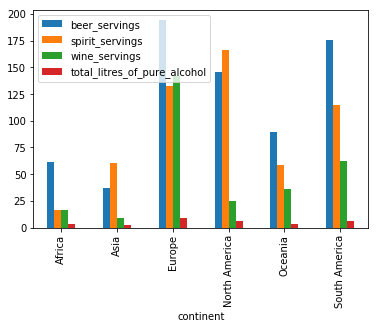

In [121]:
data=drinks.groupby('continent').mean()
data.plot(kind='bar')

<font color= 'yellow' font size="7">__Exploring pandas series__</font>

In [122]:
url = 'http://bit.ly/imdbratings'
movies = pd.read_csv(url)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [123]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [124]:
# basic summary
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [125]:
# frequency of different genres
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [126]:
# turn row counts into percentages
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
Fantasy      0.001021
History      0.001021
Name: genre, dtype: float64

In [127]:
type(movies.genre.value_counts(normalize=True))

pandas.core.series.Series

Hence we can use any Series method such as .head()

Every time when you run a method, think of what other DataFrame or Series method we can chain


In [128]:
# finding out unique values()
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [129]:
# number of unique values
movies.genre.nunique()

16

In [130]:
# crosstab is useful for exploring data further
pd.crosstab(movies.genre,movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [131]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [132]:
movies.duration.value_counts().head()

112    23
113    22
102    20
101    20
129    19
Name: duration, dtype: int64

Visualization

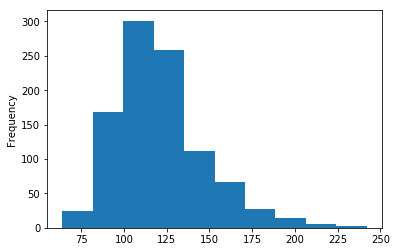

In [133]:
%matplotlib inline
data=movies.duration
data.plot(kind='hist')

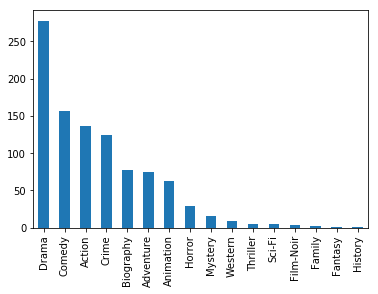

In [134]:
data_counts=movies.genre.value_counts()
data_counts.plot(kind='bar')

<font color= 'yellow' font size="7">__Handling Missing Values__</font>

In [135]:
url = 'http://bit.ly/uforeports'
ufo = pd.read_csv(url)
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


NaN shows missing values

In [136]:
# checking which are NaN (True) using isnull
# creates DataFrame of True's and False's
ufo.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [137]:
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


In [138]:
# count number of missing values in each column
# sum True's
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [139]:
# we create a pandas series of booleans
booleans = pd.Series([True,False,True])

In [140]:
# use sum() on series 
# this would sum all True
booleans.sum()

# sum uses axis=0 by default
# the following code does the same thing
# booleans.sum(axis=0)

2

In [141]:
# this allow us to see the 25 rows of missing values in the column City
ufo[ufo.City.isnull()]

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


what do we do about the missing values?


Method 1: drop missing values

In [142]:
ufo.shape

(18241, 5)

In [143]:
# drop rows if any of the 5 columns have a missing value 
# how='any' is the default, you need not include this

ufo.dropna(how='any').shape

(2486, 5)

In [144]:
# no changes made
# you can change using inplace='True'
# ufo.dropna(how='any', inplace=True).shape

In [145]:
# drop row if all of the columns are missing
ufo.dropna(how='all').shape

(18241, 5)

In [146]:
# drop row if either City or Shape reported are missing
ufo.dropna(subset=['City', 'Shape Reported'], how='any').shape

(15576, 5)

In [147]:
# drop row if both City and Shape reported are missing
ufo.dropna(subset=['City', 'Shape Reported'], how='all').shape

(18237, 5)

Method 2: Filling missing values

In [148]:
# this shows missing values (NaN)
ufo['Shape Reported'].value_counts(dropna=False)

LIGHT        2803
NaN          2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
DOME            1
PYRAMID         1
HEXAGON         1
FLARE           1
Name: Shape Reported, dtype: int64

In [149]:
# inplace=True makes the change to the data
ufo['Shape Reported'].fillna(value='VARIOUS', inplace=True)

In [150]:
ufo['Shape Reported'].value_counts(dropna=False)

VARIOUS      2977
LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
PYRAMID         1
HEXAGON         1
DOME            1
FLARE           1
Name: Shape Reported, dtype: int64

<font color= 'pink' font size="7">__Using Pandas Index__</font>

In [151]:
url = 'http://bit.ly/drinksbycountry'
drinks = pd.read_csv(url)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [152]:
drinks.index
# The index is from 0 to 193 (0, 1, 2, 3, 4... 193)

RangeIndex(start=0, stop=193, step=1)

In [153]:
drinks.columns

Index([u'country', u'beer_servings', u'spirit_servings', u'wine_servings',
       u'total_litres_of_pure_alcohol', u'continent'],
      dtype='object')

In [154]:
# index is not part of the DataFrame
drinks.shape

(193, 6)

In [155]:
# rarely people leave columns without headers
url2 = 'http://bit.ly/movieusers'
pd.read_table(url2, header=None, sep='|').head()

C:\Users\damga\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


What are indexes for?

* Identification

* Selection

* Alignment

Identification

In [156]:
# you can identify what rows we are working with here
drinks[drinks.continent=='South America']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
6,Argentina,193,25,221,8.3,South America
20,Bolivia,167,41,8,3.8,South America
23,Brazil,245,145,16,7.2,South America
35,Chile,130,124,172,7.6,South America
37,Colombia,159,76,3,4.2,South America
52,Ecuador,162,74,3,4.2,South America
72,Guyana,93,302,1,7.1,South America
132,Paraguay,213,117,74,7.3,South America
133,Peru,163,160,21,6.1,South America
163,Suriname,128,178,7,5.6,South America


Selection

In [157]:
# .loc method to retrive element/cell
drinks.loc[23, 'beer_servings']

245

In [158]:
# inplace=True makes the change 
# sets the index to 'country'
drinks.set_index('country',inplace=True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [159]:
drinks.index

Index([u'Afghanistan', u'Albania', u'Algeria', u'Andorra', u'Angola',
       u'Antigua & Barbuda', u'Argentina', u'Armenia', u'Australia',
       u'Austria',
       ...
       u'Tanzania', u'USA', u'Uruguay', u'Uzbekistan', u'Vanuatu',
       u'Venezuela', u'Vietnam', u'Yemen', u'Zambia', u'Zimbabwe'],
      dtype='object', name=u'country', length=193)

In [160]:
# country is no longer one of the columns
drinks.columns

Index([u'beer_servings', u'spirit_servings', u'wine_servings',
       u'total_litres_of_pure_alcohol', u'continent'],
      dtype='object')

In [161]:
# we can select based on country instead of a number 
# we can select more easily by setting a meaningful index
drinks.loc['Brazil','beer_servings']

245

'country' is the name of the index

We can clear this out

In [162]:
# clearing index name
drinks.index.name=None
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [163]:
# say you prefer o use the default index and you want back the column of countries
drinks.index.name='country'
drinks.reset_index(inplace=True)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [164]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [165]:
type(drinks.describe())

pandas.core.frame.DataFrame

In [166]:
drinks.describe().index

Index([u'count', u'mean', u'std', u'min', u'25%', u'50%', u'75%', u'max'], dtype='object')

In [167]:
drinks.describe().columns

Index([u'beer_servings', u'spirit_servings', u'wine_servings',
       u'total_litres_of_pure_alcohol'],
      dtype='object')

In [168]:
# .loc is a dataframe method 
# format of .loc
# .loc['index_name_or_number','column_name']
drinks.describe().loc['25%','beer_servings']

20.0

3. Alignment

In [169]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [170]:
drinks.continent.head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: object

In [171]:
drinks.set_index('country', inplace=True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [172]:
drinks.continent.head()

country
Afghanistan      Asia
Albania        Europe
Algeria        Africa
Andorra        Europe
Angola         Africa
Name: continent, dtype: object

In [173]:
type(drinks.continent.head())

pandas.core.series.Series

In [174]:
drinks.continent.value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [175]:
type(drinks.continent.value_counts())

pandas.core.series.Series

In [176]:
drinks.continent.value_counts().values

array([53, 45, 44, 23, 16, 12], dtype=int64)

In [177]:
# we can use the index to select values from the series
# this is similar to .loc for Dataframe
# because series does not have multiple columns, we can do this
drinks.continent.value_counts()['Africa']

53

In [178]:
# sort based on values in Series
drinks.continent.value_counts().sort_values()

South America    12
Oceania          16
North America    23
Asia             44
Europe           45
Africa           53
Name: continent, dtype: int64

In [179]:
# sort index based on ascending order
drinks.continent.value_counts().sort_index()

Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

<font color= 'pink' font size="7">__Selecting Multiple Rows and Columns__</font>

.loc

.iloc

.ix

In [181]:
url = 'http://bit.ly/uforeports'
ufo = pd.read_csv(url)
ufo.head(3)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


.loc usage 

 This is very powerful and flexible method

In [182]:
# .loc DataFrame method
# filtering rows and selecting columns by label

# format
# ufo.loc[rows, columns]

# row 0, all columns
ufo.loc[0, :]

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [184]:
# rows 0, 1, 2
# all columns
ufo.loc[0:2,:]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [186]:
#selecting spesific rows and all columns
ufo.loc[[0,2,3],:]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00


In [187]:
# if you leave off ", :" pandas would assume it's there
# but you should leave it there to improve code readability
ufo.loc[0:2]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [189]:
# all rows, column City
ufo.loc[:,['City']].head(2)

,City
0,Ithaca
1,Willingboro


In [190]:
# all rows
# column: City, State
ufo.loc[:,['City','State']].head(3)

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO


In [194]:
# all rows
# similar code for City through State
ufo.loc[:,'City':'State'].head(3)

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [195]:
# multiple rows and multiple columns
ufo.loc[0:2, 'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [199]:
# filter using City=='Oakland'
ufo.loc[ufo.City=='Oakland',:].head(3)

,City,Colors Reported,Shape Reported,State,Time
1694,Oakland,NaN,CIGAR,CA,7/21/1968 14:00
2144,Oakland,NaN,DISK,CA,8/19/1971 0:00
4686,Oakland,NaN,LIGHT,MD,6/1/1982 0:00


In [200]:
# again, specifying the rows and columns you want
# this would be the best way to do it compared to chain indexing 
ufo.loc[ufo.City=='Oakland','State']

1694     CA
2144     CA
4686     MD
7293     CA
8488     CA
8768     CA
10816    OR
10948    CA
11045    CA
12322    CA
12941    CA
16803    MD
17322    CA
Name: State, dtype: object

In [201]:
# chain indexing 
# there may be issues in some cases
# try not to use this
ufo.loc[ufo.City=='Oakland'].State

1694     CA
2144     CA
4686     MD
7293     CA
8488     CA
8768     CA
10816    OR
10948    CA
11045    CA
12322    CA
12941    CA
16803    MD
17322    CA
Name: State, dtype: object

iloc usage

In [203]:
ufo.iloc[:,[0,3]].head()

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


In [205]:
# iloc excludes 4 (compared to loc where it includes 4)
# iloc includes 0
ufo.iloc[:, 0:4].head()

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY


In [208]:
# this is the major difference
# exclusive of 3
ufo.iloc[0:3, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [211]:
# non-explicit code
ufo[['City', 'State']]

# explicit code
ufo.loc[:, ['City', 'State']].head(3)

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO


In [212]:
# ambiguous code again, are we referring to rows or columns?
ufo[0:2]


,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


In [213]:
# use iloc!
ufo.iloc[0:2, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


.ix usage

Mix labels and integers when using selection.

In [214]:
drinks_url = 'http://bit.ly/drinksbycountry'
drinks = pd.read_csv(drinks_url, index_col='country')
drinks.head(3)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa


In [215]:
drinks.ix['Albania',0]

C:\Users\damga\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


89

In [216]:
drinks.ix[1, 'beer_servings']

C:\Users\damga\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


89

In [217]:
# for .ix, columns are exclusive of 2
drinks.ix['Albania':'Andorra', 0:2]

C:\Users\damga\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,beer_servings,spirit_servings
country,,
Albania,89,132
Algeria,25,0
Andorra,245,138


In [218]:
# for rows, .ix is inclusive from start to end
# for columns, .ix is exclusive of end but inclusive of start
ufo.ix[0:2, 0:2]

C:\Users\damga\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,City,Colors Reported
0,Ithaca,NaN
1,Willingboro,NaN
2,Holyoke,NaN


<font color= 'pink' font size="7">__Using "inplace" parameter__</font>

In [219]:
url = 'http://bit.ly/uforeports'
ufo = pd.read_csv(url)
ufo.head(3)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [221]:
# dropping City column 
# you can see that the City column is not gone 
# drop() method has inplace=False as default
ufo.drop('City',axis=1)
ufo.head(3)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [222]:
ufo.drop('City',axis=1,inplace=True)
ufo.head(3)

,Colors Reported,Shape Reported,State,Time
0,NaN,TRIANGLE,NY,6/1/1930 22:00
1,NaN,OTHER,NJ,6/30/1930 20:00
2,NaN,OVAL,CO,2/15/1931 14:00


In [223]:
# dropna with how='any' would drop any row with 'NaN'
ufo.dropna(how='any').shape

(2490, 4)

In [224]:
ufo.shape
# as you can see, we lose a lot of rows because of dropna
# but the underlying data has not been affected because inplace=False for .dropna()

(18241, 4)

In [225]:
# some examples with inplace=False
# most are set to False

# ufo.set_index()
# ufo.rename()

In [226]:
# you can not use inplace=True and use an assignment instead
ufo = ufo.set_index('Time')

In [229]:
ufo.tail()

,Colors Reported,Shape Reported,State
Time,,,
12/31/2000 23:00,NaN,TRIANGLE,IL
12/31/2000 23:00,NaN,DISK,IA
12/31/2000 23:45,NaN,NaN,WI
12/31/2000 23:45,RED,LIGHT,WI
12/31/2000 23:59,NaN,OVAL,FL


In [235]:
ufo.fillna(method='bfill').tail()
#get bottom

,Colors Reported,Shape Reported,State
Time,,,
12/31/2000 23:00,RED,TRIANGLE,IL
12/31/2000 23:00,RED,DISK,IA
12/31/2000 23:45,RED,LIGHT,WI
12/31/2000 23:45,RED,LIGHT,WI
12/31/2000 23:59,NaN,OVAL,FL


In [236]:
ufo.fillna(method='ffill').tail()
# get upper

,Colors Reported,Shape Reported,State
Time,,,
12/31/2000 23:00,RED,TRIANGLE,IL
12/31/2000 23:00,RED,DISK,IA
12/31/2000 23:45,RED,DISK,WI
12/31/2000 23:45,RED,LIGHT,WI
12/31/2000 23:59,RED,OVAL,FL


<font color= 'pink' font size="7">__Making DataFrame Smaller and Faster__</font>

In [238]:
url = 'http://bit.ly/drinksbycountry'
drinks = pd.read_csv(url)
drinks.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa


In [239]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


object usually means there's a string

memory usage

DataFrame takes at least 9.1kb of memory

It might be a lot more depending on what's in those object columns

In this case, they're just strings of countries and continents

In [241]:
# we can count the actual memory usage using the following command
drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 24.4 KB


In [242]:
# we can check how much space each column is actually taking
# the numbers are in bytes, not kilobytes
drinks.memory_usage(deep=True)

Index                             72
country                         9500
beer_servings                   1544
spirit_servings                 1544
wine_servings                   1544
total_litres_of_pure_alcohol    1544
continent                       9244
dtype: int64

In [243]:
type(drinks.memory_usage(deep=True))

pandas.core.series.Series

In [245]:
# since it is a series, we can use sum()
drinks.memory_usage(deep=True).sum()

24992

In [246]:
# there are only 6 unique values of continent
# we can replace strings with digits to save space
sorted(drinks.continent.unique())

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [247]:
drinks.continent.head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: object

In [249]:
# converting continent from object to category
# it stores the strings as integers
drinks['continent']=drinks.continent.astype('category')

In [252]:
drinks.continent.head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: category
Categories (6, object): [Africa, Asia, Europe, North America, Oceania, South America]

In [254]:
# .cat is similar to .str
# we can do more stuff after .cat
# we can see here how pandas represents the continents as integers

drinks.continent.cat.codes.head()

0    1
1    2
2    0
3    2
4    0
dtype: int8

In [255]:
# before this conversion, it was over 12332 bytes
# now it is 584 bytes
drinks.memory_usage(deep=True)

Index                             72
country                         9500
beer_servings                   1544
spirit_servings                 1544
wine_servings                   1544
total_litres_of_pure_alcohol    1544
continent                        648
dtype: int64

In [256]:
# we can convert country to a category too
drinks['country']=drinks.country.astype('category')
drinks.country.head()

0    Afghanistan
1        Albania
2        Algeria
3        Andorra
4         Angola
Name: country, dtype: category
Categories (193, object): [Afghanistan, Albania, Algeria, Andorra, ..., Vietnam, Yemen, Zambia, Zimbabwe]

In [257]:
# this is larger! 
# this is because we've too many categories
drinks.memory_usage(deep=True)

Index                              72
country                         15006
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         648
dtype: int64

In [258]:
drinks.country.unique()

[Afghanistan, Albania, Algeria, Andorra, Angola, ..., Venezuela, Vietnam, Yemen, Zambia, Zimbabwe]
Length: 193
Categories (193, object): [Afghanistan, Albania, Algeria, Andorra, ..., Vietnam, Yemen, Zambia, Zimbabwe]

In [259]:
# now we've 193 digits
# it points to a lookup table with 193 strings!
drinks.country.cat.categories

Index([u'Afghanistan', u'Albania', u'Algeria', u'Andorra', u'Angola',
       u'Antigua & Barbuda', u'Argentina', u'Armenia', u'Australia',
       u'Austria',
       ...
       u'United Arab Emirates', u'United Kingdom', u'Uruguay', u'Uzbekistan',
       u'Vanuatu', u'Venezuela', u'Vietnam', u'Yemen', u'Zambia', u'Zimbabwe'],
      dtype='object', length=193)

The key to converting to category is to ensure that there are few categories to save memory usage. If there are too many, we should not convert.

In [261]:
# passing a dictionary {} to the DataFrame method =
id_list=[100, 101, 102, 103]
quality_list=['good', 'very good', 'good', 'excellent']
df=pd.DataFrame({'ID':id_list, 'quality':quality_list})
df

,ID,quality
0,100,good
1,101,very good
2,102,good
3,103,excellent


In [267]:
#this sorts using alphaetical order
#df.sort_values(by='quality')
# but there is a logical ordering to these categories, we need to tell pandas there is a logical ordering
df.sort_values('quality')
df.quality

0         good
1    very good
2         good
3    excellent
Name: quality, dtype: category
Categories (3, object): [good < very good < excellent]

In [265]:
# how do we tell pandas there is a logical order?
quality_list_ordered=['good', 'very good', 'excellent']
df['quality']=df.quality.astype('category', categories=quality_list_ordered, ordered=True)
df.quality

C:\Users\damga\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2878: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


0         good
1    very good
2         good
3    excellent
Name: quality, dtype: category
Categories (3, object): [good < very good < excellent]

In [268]:
# here we have good < very good < excellent
df.quality

0         good
1    very good
2         good
3    excellent
Name: quality, dtype: category
Categories (3, object): [good < very good < excellent]

In [270]:
# now it sorts using the logical order we defined
df.sort_values('quality')

,ID,quality
0,100,good
2,102,good
1,101,very good
3,103,excellent


In [271]:
# we can now use boolean conditions with this
# here we want all columns where the row > good
<font color= 'pink' font size="7">__Making DataFrame Smaller and Faster__</font>df.loc[df.quality > 'good', :]

,ID,quality
1,101,very good
3,103,excellent


<font color= 'pink' font size="7">__Pandas and Scikit-Learn__</font>

In [273]:
url = 'http://bit.ly/kaggletrain'
train = pd.read_csv(url)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Create X features (DataFrame)

In [274]:
train.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [279]:
# Pclass: passenger class
# Parch: parents and children

feature_cols = ['Pclass','Parch']
X = train.loc[:,feature_cols]
X.shape

(891, 2)

Create y responses (Series)

In [282]:
# now we want to create our response vector
y=train.Survived
y.shape

(891L,)

Build scikit-learn model

In [283]:
# 1. import 
from sklearn.linear_model import LogisticRegression

# 2. instantiate model
logreg = LogisticRegression()

# 3. fit
logreg.fit(X,y)

C:\Users\damga\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [284]:
url_test = 'http://bit.ly/kaggletest'
test = pd.read_csv(url_test)
# missing Survived column because we are predicting
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


X_new features for test data

In [290]:
X_new=test.loc[:,feature_cols]
# 4. predict
new_pred_class=logreg.predict(X_new)

Save DataFrame to csv

In [292]:
# Kaggle wants 2 columns
# new_pred_class
# PassengerId
# pandas would align them next to the each other
# to ensure the first column is PassengerId, use .set_index

kaggle_data = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived': new_pred_class}).set_index('PassengerId')
kaggle_data.to_csv('sub.csv')

In [293]:
# save the train data to disk using pickle
train.to_pickle('train.pkl')

In [294]:
# read data
<font color= 'pink' font size="7">__Pandas and Scikit-Learn__</font>pd.read_pickle('train.pkl')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<font color= 'pink' font size="7">__Randomly Sample Rows__</font>

Randomly sample rows from a DataFrame

In [296]:
link = 'http://bit.ly/uforeports'
ufo = pd.read_csv(link)
ufo.head(3)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [297]:
# to get 3 random rows
# each time you run this, you would have 3 different rows
ufo.sample(n=3)

,City,Colors Reported,Shape Reported,State,Time
11400,Spring Valley,NaN,FIREBALL,CA,4/11/1998 19:00
5651,Gettysburg,NaN,NaN,PA,6/21/1987 23:00
2129,Tucson,NaN,TEARDROP,AZ,7/22/1971 0:15


In [304]:
# you can use random_state for reproducibility
ufo.sample(n=3, random_state=2)

,City,Colors Reported,Shape Reported,State,Time
7236,Mesquite,NaN,OTHER,NV,11/25/1993 15:00
14432,Pittsburg,NaN,OTHER,CA,9/4/1999 0:38
4559,Mondel,NaN,NaN,NM,6/18/1981 3:00


In [305]:
# fraction of rows
# here you get 75% of the rows
ufo.sample(frac=0.75,random_state=99).head()

,City,Colors Reported,Shape Reported,State,Time
6250,Sunnyvale,NaN,OTHER,CA,12/16/1989 0:00
8656,Corpus Christi,NaN,NaN,TX,9/13/1995 0:10
2729,Mentor,NaN,DISK,OH,8/8/1974 10:00
7348,Wilson,NaN,LIGHT,WI,6/1/1994 1:00
12637,Lowell,NaN,CIRCLE,MA,11/26/1998 10:00


For machine learning train-test split

You need non-overlapping rows in your train and test sets

In [306]:
train = ufo.sample(frac = 0.75, random_state = 99)

In [307]:
# you can not simply split 0.75 and 0.25 without overlapping
# this code tries to find that train = 75% and test = 25%
test = ufo.loc[~ufo.index.isin(train.index),:]

<font color= 'pink' font size="7">__Creating Dummy Variables__</font>

In [309]:
url = 'http://bit.ly/kaggletrain'
train = pd.read_csv(url)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [310]:
train.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [312]:
train['Sex_num']=train.Sex.map({'male':0, 'female':1})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Alternative method for creating dummy variables

In [321]:
pd.get_dummies(train.Sex).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


If you have k unique terms, you use k - 1 dummy variables to represent

In [326]:
# iloc works on positions (integers)
# this iloc code would always for any number and name of categories
pd.get_dummies(train.Sex, prefix='Sex').loc[:,:'Sex_female'].head()

,Sex_female
0,0
1,1
2,1
3,1
4,0


In [327]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

As we can see here, there are 3 unique terms

In [332]:
# we only need k - 1, hence 2 dummy variables here
embarked_dummies=pd.get_dummies(train.Embarked, prefix='Embarked').iloc[:,1:].head()

In [333]:
# concatenate columns
# axis=1
pd.concat([train,embarked_dummies],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0.0,1.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,NaN,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,NaN,NaN
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,NaN,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,NaN,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,NaN,NaN


In [334]:
# create dummy variables for multiple categories
# drop_first=True handles k - 1 
pd.get_dummies(train,columns=['Sex','Embarked'], drop_first=True)

# this drops original Sex and Embarked columns
# and creates dummy variables

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_num,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,1
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,0,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,0,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,0,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,1,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,1,0,0,0


<font color= 'pink' font size="7">__Working with Date and Time__</font>

In [337]:
url = 'http://bit.ly/uforeports'
ufo = pd.read_csv(url)
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [342]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [339]:
# 5 characters from the end to 3 characters from the end
# this is quite a chore
ufo.Time.str.slice(-5,-3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int32

In [340]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [341]:
# we will convert the Time column to datatime format
# there are many options to ensure this works well with your data
ufo['Time']=pd.to_datetime(ufo.Time)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [343]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [345]:
ufo.Time.dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [346]:
ufo.Time.dt.weekday.head()

0    6
1    0
2    6
3    0
4    1
Name: Time, dtype: int64

In [347]:
ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

Timestamps

We can use it for comparison and mathematical operations

In [350]:
ts = pd.to_datetime('1/1/1999')
ufo.loc[ufo.Time >= ts, :].head()

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00


In [354]:
ufo.Time.max()

Timestamp('2000-12-31 23:59:00')

In [355]:
ufo.Time.max() - ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [357]:
(ufo.Time.max() - ufo.Time.min()).days

25781

Plotting

In [358]:
%matplotlib inline

In [359]:
ufo['Year']=ufo.Time.dt.year
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


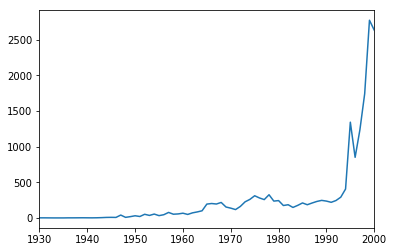

In [361]:
ufo.Year.value_counts().sort_index().plot()